## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [3]:
%pip install category-encoders

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [ ]:
# Ваш код здесь

### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [5]:
# Ваш код здесь
# посмотрим тип полей
Xtrain.dtypes

f1          int64
f2        float64
f3          int64
f4        float64
f5          int64
f6        float64
f7        float64
f8        float64
f9        float64
f10       float64
f11       float64
f12         int64
f13         int64
f14       float64
target      int64
dtype: object

In [6]:
# посмотрим еще раз инофрмацию - посмотрим пропуски
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [7]:
# функция для вывода информации оо пропусках
def print_useful_rows_info(df):
    print('Количество полностью заполненных объектов из всей выборки:', 
          len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(df.dropna()) / len(df) * 100, 2))

In [8]:
print_useful_rows_info(Xtrain)

Количество полностью заполненных объектов из всей выборки: 5567
Процент полностью заполненных объектов из всей выборки: 74.23


In [9]:
Xtrain[Xtrain.f7.isna()]

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
15,62,218.593930,121319,0.408246,13,0.445026,NaN,0.444334,25.606721,0.300298,3103.0,0,40,0.244418,1
23,53,218.593930,167170,0.171817,9,0.066372,NaN,0.103024,12.464986,0.113590,0.0,0,40,0.244418,0
28,54,218.593930,285854,0.171817,9,0.445026,NaN,0.444334,25.606721,0.300298,0.0,0,40,0.244418,1
34,29,218.593930,133937,0.726190,16,0.049127,NaN,0.009499,25.606721,0.300298,0.0,0,40,0.244418,0
37,37,218.593930,227545,0.179322,10,0.445026,NaN,0.444334,25.606721,0.300298,0.0,0,44,0.244418,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,36,218.593930,118909,0.239316,12,0.049127,NaN,0.066581,12.464986,0.113590,0.0,0,40,0.227273,0
7468,64,386.473430,199298,0.104575,4,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,30,0.185185,0
7473,26,218.593930,270276,0.171817,9,0.049127,NaN,0.103024,25.606721,0.113590,0.0,0,40,0.244418,0
7479,69,114.416476,171050,0.171817,9,0.066372,NaN,0.103024,25.606721,0.113590,0.0,0,9,0.244418,0


In [10]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


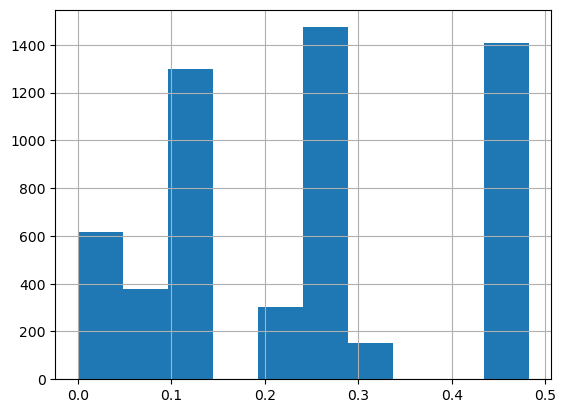

In [11]:
# гистограмму значений f7 без учета пропусков
import matplotlib.pyplot as plt
Xtrain['f7'].dropna().hist()
plt.show()

Пропусков в f7: 1875


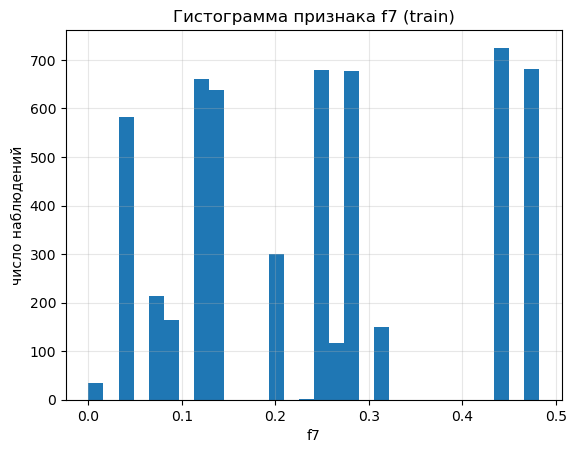

In [12]:

# Считаем, сколько пропусков
n_missing = Xtrain['f7'].isna().sum()
print(f'Пропусков в f7: {n_missing}')

# Рисуем гистограмму без пропусков
(
    Xtrain['f7']        # берём столбец
      .dropna()         # выкидываем NaN'ы
      .hist(bins=30)    # количество корзин подберите под задачу
)

plt.xlabel('f7')
plt.ylabel('число наблюдений')
plt.title('Гистограмма признака f7 (train)')
plt.grid(True, alpha=.3)
plt.show()

In [14]:
#Заполняю пропуски средним значением
mean_f7 = Xtrain['f7'].mean()          # считаем среднее только по непустым
Xtrain['f7'] = Xtrain['f7'].fillna(mean_f7)

Пропусков в f7: 0


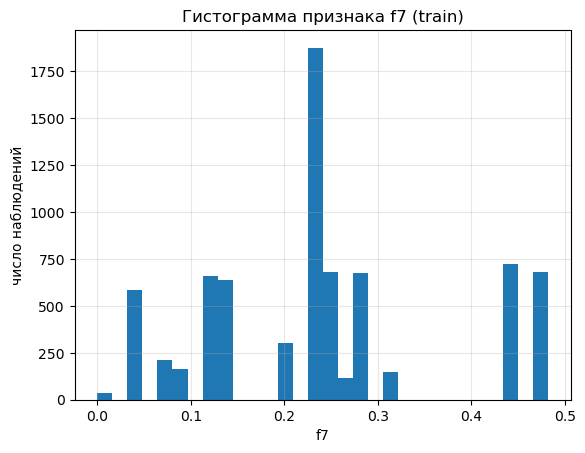

In [15]:
n_missing = Xtrain['f7'].isna().sum()
print(f'Пропусков в f7: {n_missing}')

# Рисуем гистограмму без пропусков
(
    Xtrain['f7']        # берём столбец
      .dropna()         # выкидываем NaN'ы
      .hist(bins=30)    # количество корзин подберите под задачу
)

plt.xlabel('f7')
plt.ylabel('число наблюдений')
plt.title('Гистограмма признака f7 (train)')
plt.grid(True, alpha=.3)
plt.show()

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [ ]:
from sklearn.metrics import f1_score

# Ваш код здесь

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [ ]:
# Ваш код здесь

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [ ]:
# Ваш код здесь

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [ ]:
# Ваш код здесь

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

In [ ]:
# Ваш текст здесь

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.